In [1]:
# !pip install pyyaml h5py

In [2]:
import os

In [4]:
import cv2

In [5]:
img = cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-10005.png')

In [6]:
import matplotlib.pyplot as plt

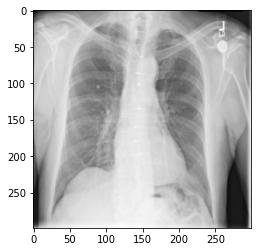

In [7]:
plt.imshow(img)

In [8]:
img.shape

(299, 299, 3)

In [9]:
import numpy as np

In [10]:
img = img / 255.0
img = cv2.resize(img, (100, 100))

In [11]:
img.shape

(100, 100, 3)

In [13]:
img = np.reshape(img, (1, 100, 100, 3))

In [14]:
img.shape

(1, 100, 100, 3)

In [15]:
import tensorflow as tf

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [17]:
model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [18]:
checkpoint_path = "checkpoint/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

model.load_weights(checkpoint_path)

In [19]:
# loss, acc = model.evaluate(x_test, y_test, verbose=2)

In [20]:
model.predict(img)

1/1 [==============================] - 0s 87ms/step


array([[0.00268774]], dtype=float32)